Dimensionality reduction is the second type of unsupervised learning problem. It is a general term that refers to techniques used to reduce the number of input variables or features in a dataset

**Motivation of Dimensionality reduction:**
> Data compression: It not only allows us to compress the data & have it to use less computer memory but it also allows us to speed up learning algorithm.




**Curse of Dimensionality**:

Lets assume we have a dataset with 300 features and it gives price of house as target column. We train n models on different subsets of data.

**For example**

Model A will be trained on three important features. It will give Accuracy A

Model B will be trained on 6 important features. It will give Accuracy B.

Model C will be trained on 15 features.

Model D is trained on 50 features.

Model E is trained on 300 features.

- Accuracy trend of all models will be like this:

   - Accuracy A < Accuracy B < Accuracy C > Accuracy D > Accuracy E

Accuracy D and E is lower as compared to other models because we have given more features to model. And model tends to capture all noise in data, results in model overfitting, eventually decreasing overall performance of model.

**Model Performance Degrade**


Two different ways to prevent dimensionality reduction:


*   Feature Selection
*   Dimensionality reduction (Feature Extraction)



Why dimensionality reduction?
- Prevent curse of dimensionality
- Improve model performance
- To visualize data

**Principle Dimentionality Reduction (PCA)**

The Principal Component Analysis is a popular unsupervised feature extraction technique for reducing the dimensionality of large data sets. It increases interpretability yet, at the same time, it minimizes information loss. It helps to find the most significant features in a dataset and makes the data easy for plotting in 2D and 3D. PCA helps in finding a sequence of linear combinations of variables.


[PCA](https://www.sciencedirect.com/science/article/abs/pii/009830049390090R)

## Geometric Intuition of feature selection

Let’s take two features as F1 and F2 for our geometric intuition, in this F1 represents the number of rooms and another feature F2 represents number of grocery shops near house. This represents that our dataset has 2D data F1 and F2. Now our task is to convert or reduce their dimension into 1-D

[2-D –> 1-D]


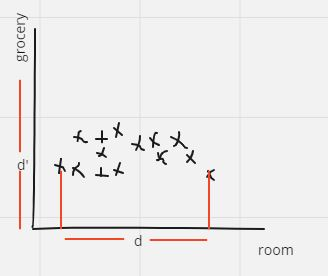

as you see d > d'
So we will select room column. That's mean we select feature with more variance.


## Geometric intuition of PCA

Again we take two features as F1 and F2, in this F1 represents the number of rooms and another feature F2 represents number of washrooms.

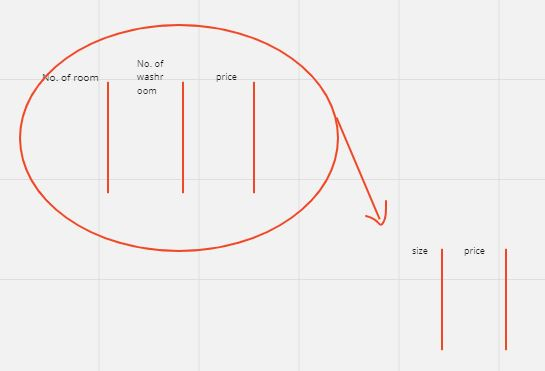


It make new set of features from existing features. And choose best subset of features from new feature set.

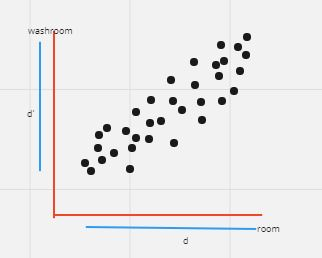

In above picture we plot both features and we can see d = d'. So we can not decide which feature to choose via feature selection. We will do following:


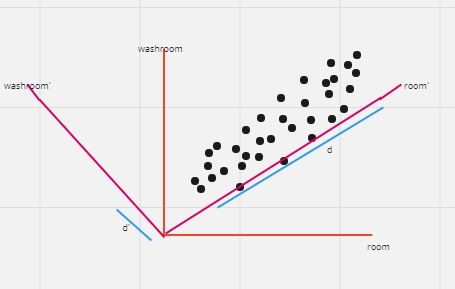

When we rotate axis, room' is called pricipal component 1 and washroom' is called PC2. Pricipal component is proportional to number of features in data. In discussed example we will choose PC1 because variance of data is greater on PC1. Now we will ttransform whole data according to PC1.

### Why Variance is important

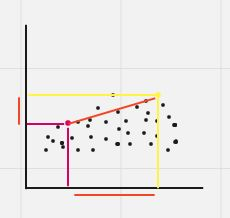

## Problem Formulation


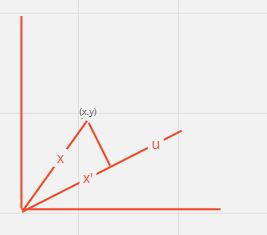

let's suppose we only have a point ̄x. We ploted this point and draw a unit vertor ̄u and we project ̄x on ̄u.

$$
\frac{̄u . ̄x}{|u|}
$$

This gives a scalar value that is length. We have to do this for every point in dataset. Each point will return a scalar value which is giving us length of projection of particular vector on unit vector.

We will choose that unit vector whose variance will be maximum.

$$
\frac{1}{n} \sum (u^t x_i - u^t ̄x)^2
$$

This gives variance of unit vector ̄u. ̄x is the mean of projected points.

Now we will use PCA mathematically to find that unit vector u for which variance will be maximam. It will become optimization problem.


### Covariance

Covariance is the method that is used to measure the relationship between two random variables or we can say how X relates to Y. Mathematically it is the summation of variance of two random variables.


### Covariance matrix

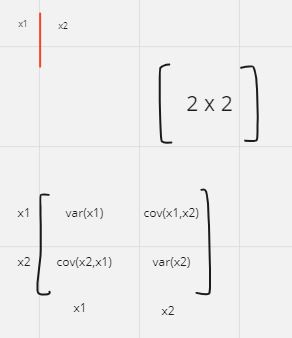


cov(a,b) == cov(b,a)

So this will be square and symmetrical matrix. It tell spread of each axis and tell covariance of different features

When Matrices are applied as linear transformations whole cordinate system will be transformed in terms of both direction and magnitude.

### Eigen Vectors

Are special vectors which does not change direction when transformation applied.

$$
A v = λ v
$$

A is matrix, v is eigen vector and λ is eigen value.

### Eigen vectors

How much eigen vector's magnitude change after transformation.

## Step by Step
1. Mean centering
2. Find covariance matrix
3. Find eigen value and eigen vectors for covariance matrix.


### How to transform points?

Take dot product of points with transpose of vectors.

## Pros

1. Dimentionality reduction
2. Visulization
3. Noise reduction
4. Feature Independence
5. Faster execution of algorithm

## Cons
1. Assumtion of linearity
2. Outliers can impact results

In [4]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = df.append(df1,ignore_index=True)

df = df.sample(40)

<ipython-input-4-459eff829b6b>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1,ignore_index=True)


In [5]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [6]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

In [7]:
# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [8]:
# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [9]:
# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [10]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [11]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [13]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [14]:
transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


In [15]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()